<a href="https://colab.research.google.com/github/nisha1365/Sanofi-POC/blob/main/NMF_Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/my_data.csv")
df

,Unnamed: 0,tweet_id,external_twitter_id,text,author_id,created_at,lang,referenced_tweets_type,referenced_tweets_id,infos,association_tweet_id,association_scope_id
0,0,1030258,1.684840e+18,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,9.050890e+17,28-07-2023 08:18,en,0,0.000000e+00,{},1030258,10
1,1,1030186,1.684590e+18,"Roche Drops Hemophilia A Candidate, Prepares f...",7.638583e+07,27-07-2023 15:51,en,0,0.000000e+00,{},1030186,10
2,2,1030263,1.684810e+18,Roche moves one Spark hemophilia gene therapy ...,1.481280e+18,28-07-2023 06:34,en,0,0.000000e+00,{},1030263,10
3,3,1030274,1.684720e+18,On #WorldHepatitisDay we put middle finger up ...,1.145270e+18,28-07-2023 00:27,en,0,0.000000e+00,{},1030274,10
4,4,1030288,1.684660e+18,"One of our newest internship programs, launche...",2.112887e+08,27-07-2023 20:13,en,3,1.684630e+18,{},1030288,10
...,...,...,...,...,...,...,...,...,...,...,...,...
29798,29798,1683839551645814784,NaN,"Hear more from Mosi Williams, Pys.D, on the la...",1.479181e+18,2023-07-25 14:00:07,en,0,0.000000e+00,{},1683839551645814784,10
29799,29799,1683938283003183104,NaN,"Was discussing hemophilia with an intelligent,...",2.760856e+08,2023-07-25 20:32:27,en,0,0.000000e+00,{},1683938283003183104,10
29800,29800,1683861079674195968,NaN,The affected &amp; infected have waited decade...,1.104181e+08,2023-07-25 15:25:40,en,3,1.683849e+18,{},1683861079674195968,10
29801,29801,1683918306082955264,NaN,"@MohmdBio Sickle cell anemia, Thalassemia, Hem...",1.179873e+18,2023-07-25 19:13:04,en,2,1.683918e+18,{},1683918306082955264,10


In [3]:
columns_to_keep = ['author_id','tweet_id','text','created_at']

new_df = df[columns_to_keep]
print(new_df)

          author_id             tweet_id  \
0      9.050890e+17              1030258   
1      7.638583e+07              1030186   
2      1.481280e+18              1030263   
3      1.145270e+18              1030274   
4      2.112887e+08              1030288   
...             ...                  ...   
29798  1.479181e+18  1683839551645814784   
29799  2.760856e+08  1683938283003183104   
29800  1.104181e+08  1683861079674195968   
29801  1.179873e+18  1683918306082955264   
29802  4.867600e+08  1683834001562140672   

                                                    text           created_at  
0      3 peaks Challenge #AxioActive💪\n\nOn the 12th ...     28-07-2023 08:18  
1      Roche Drops Hemophilia A Candidate, Prepares f...     27-07-2023 15:51  
2      Roche moves one Spark hemophilia gene therapy ...     28-07-2023 06:34  
3      On #WorldHepatitisDay we put middle finger up ...     28-07-2023 00:27  
4      One of our newest internship programs, launche...     27-07-2023

In [41]:
new_df.head()

,author_id,tweet_id,text,created_at
0,9.050890e+17,1030258,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,28-07-2023 08:18
1,7.638583e+07,1030186,"Roche Drops Hemophilia A Candidate, Prepares f...",27-07-2023 15:51
2,1.481280e+18,1030263,Roche moves one Spark hemophilia gene therapy ...,28-07-2023 06:34
3,1.145270e+18,1030274,On #WorldHepatitisDay we put middle finger up ...,28-07-2023 00:27
4,2.112887e+08,1030288,"One of our newest internship programs, launche...",27-07-2023 20:13


In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

In [43]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [44]:
## defining all utilty functions - needed for Data cleaning and processing

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

In [64]:
# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
     "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
     "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]

    return text

def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text):
    pattern = r"(?u)\b\w\w+\b"
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens

# Funtion to remove duplicate words
def unique_words(text):
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

In [65]:
# Get the word count
df['word_count'] = df['text'].apply(word_count)
df['word_count'].mean()

28.411703519779888

In [66]:
# Process the text
df['processed_text'] = df['text'].apply(process_text)
df.head()

,Unnamed: 0,tweet_id,external_twitter_id,text,author_id,created_at,lang,referenced_tweets_type,referenced_tweets_id,infos,association_tweet_id,association_scope_id,word_count,processed_text
0,0,1030258,1.684840e+18,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,9.050890e+17,28-07-2023 08:18,en,0,0.000000e+00,{},1030258,10,40,"[peak, challeng, #axioact, th, august, axiolog..."
1,1,1030186,1.684590e+18,"Roche Drops Hemophilia A Candidate, Prepares f...",7.638583e+07,27-07-2023 15:51,en,0,0.000000e+00,{},1030186,10,13,"[roch, drop, hemophilia, candid, prepar, impac..."
2,2,1030263,1.684810e+18,Roche moves one Spark hemophilia gene therapy ...,1.481280e+18,28-07-2023 06:34,en,0,0.000000e+00,{},1030263,10,12,"[roch, spark, hemophilia, gene, therapi, phiii..."
3,3,1030274,1.684720e+18,On #WorldHepatitisDay we put middle finger up ...,1.145270e+18,28-07-2023 00:27,en,0,0.000000e+00,{},1030274,10,36,"[#worldhepatitisday, middl, finger, #australia..."
4,4,1030288,1.684660e+18,"One of our newest internship programs, launche...",2.112887e+08,27-07-2023 20:13,en,3,1.684630e+18,{},1030288,10,26,"[newest, internship, program, launch, raquel, ..."


In [68]:
df['processed_text']

0        [peak, challeng, #axioact, th, august, axiolog...
1        [roch, drop, hemophilia, candid, prepar, impac...
2        [roch, spark, hemophilia, gene, therapi, phiii...
3        [#worldhepatitisday, middl, finger, #australia...
4        [newest, internship, program, launch, raquel, ...
                               ...                        
29798    [hear, mosi, william, pys, latest, episod, glo...
29799    [discuss, hemophilia, intellig, educ, person, ...
29800    [affect, infect, wait, decad, acknowledg, did,...
29801    [@mohmdbio, sickl, cell, anemia, thalassemia, ...
29802    [save, date, tee, cure, monday, novemb, hit, e...
Name: processed_text, Length: 29803, dtype: object

In [69]:
# Descriptive statistics for word count
df['word_count'].describe()

count    29803.000000
mean        28.411704
std         12.851073
min          1.000000
25%         18.000000
50%         29.000000
75%         38.000000
max         99.000000
Name: word_count, dtype: float64

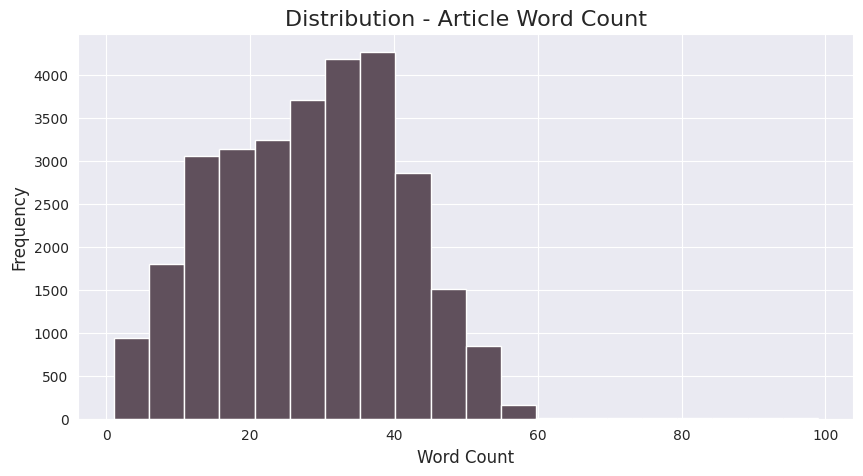

In [70]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)


plt.show()

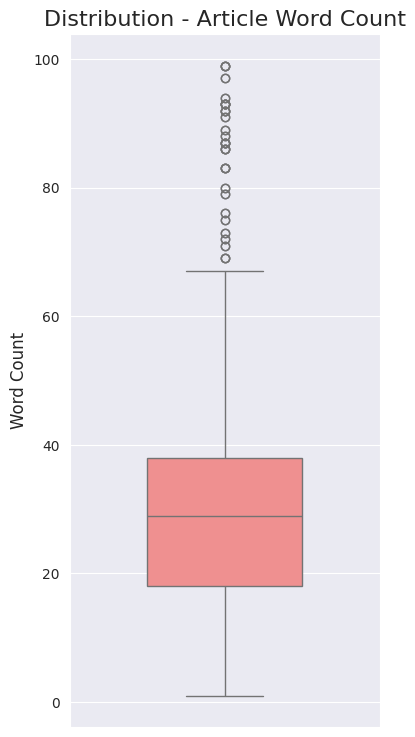

In [71]:
 #Plot a boxplot of the word counts
fig = plt.figure(figsize=(4,9))

sns.boxplot(
    df['word_count'],
    orient='v',
    width=.5,
    color='#ff8080'
)

plt.ylabel("Word Count", fontsize=12)
plt.title('Distribution - Article Word Count', fontsize=16)


plt.show()

In [72]:
# Get the top 20 most common words among all the text of the tweets
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,hemophilia,18832
1,bleed,6179
2,haemophilia,6138
3,day,4736
4,#hemophilia,4422
5,patient,4289
6,disord,4267
7,world,3721
8,blood,3523
9,treatment,3054


<ipython-input-73-ae37a815d556>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(
<ipython-input-73-ae37a815d556>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(


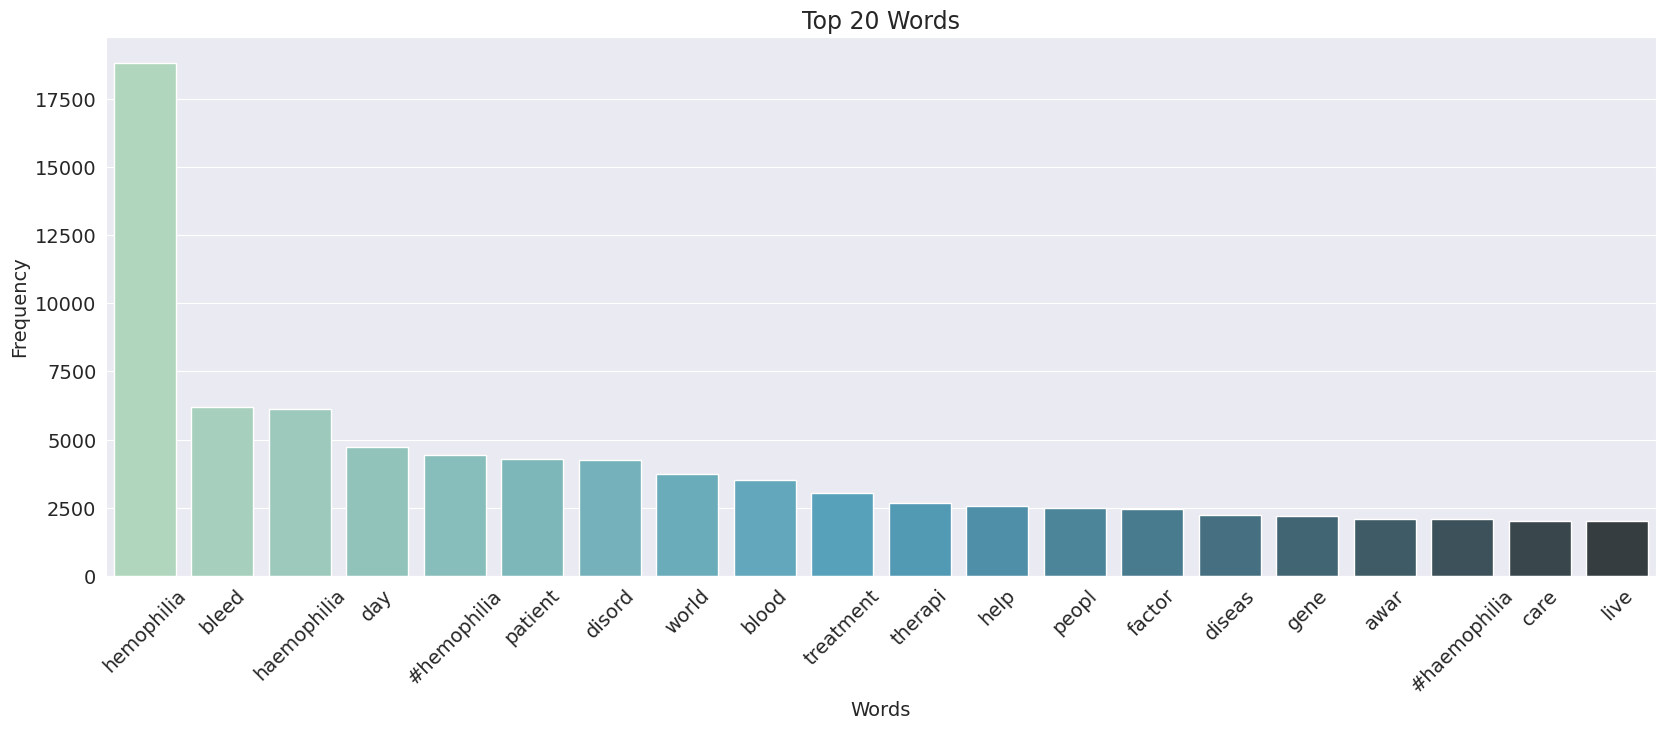

In [73]:
# Plot a bar chart for the top 20 most frequently occuring words
fig = plt.figure(figsize=(20,7))

g = sns.barplot(
    x='word',
    y='frequency',
    data=top_20,
    palette='GnBu_d'
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Top 20 Words', fontsize=17)


plt.show()

In [17]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

39157

In [34]:
def process_text (text):
   text = casual_tokenizer(text)
   text = [each. lower() for each in text]
   text = [re. sub(' [0-9]+', '', each) for each in text]
   text = [expandContractions(each, c_re=c_re) for each in text]
   text = [SnowballStemmer( 'english').stem(each) for each in text]
   text = [w for w in text if w not in punc]
   text = [w for w in text if w not in stop_words]
   text = [each for each in text if len (each) > 1]
   text = [each for each in text if ' ' not in each]
   text = [re.sub(r'#\w+','', each) for each in text]
   text = [re.sub(r'http\S+','', each) for each in text]
   return text

In [35]:
texts = df['processed_text']

tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

In [36]:
nmf = NMF(
    n_components=20,
    init='nndsvd'
).fit(tfidf)

For now we will just set it to 20 and later on we will use the coherence score to select the best number of topics automatically.

## Automatically Selecting the Best Number of Topics

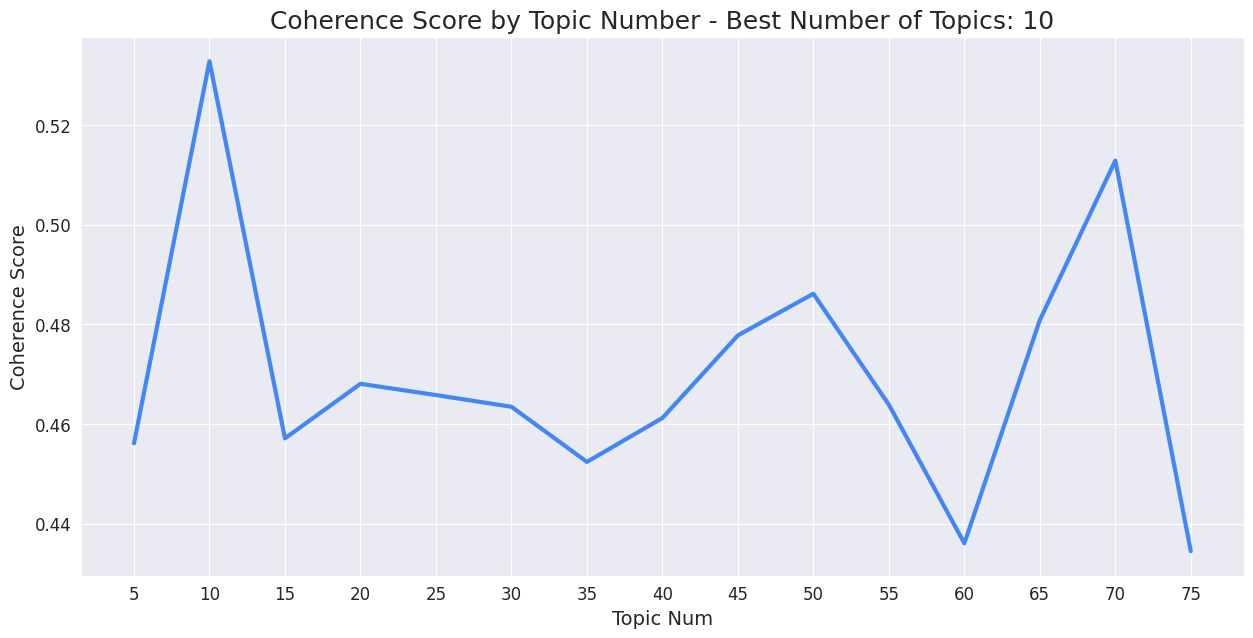

In [37]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )

    coherence_scores.append(round(cm.get_coherence(), 5))



# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)


plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()


**Summarizing Topics**

Another challenge is summarizing the topics. The best solution here would to have a human go through the texts and manually create topics. This is obviously not ideal. Another option is to use the words in each topic that had the highest score for that topic and them map those back to the feature names. We’ll use top 8 words.

Here’s what that looks like:

In [38]:
texts = df['processed_text']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names_out()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha_W=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

In [39]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 8

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()

,0,1,2,3,4,5,6,7,topics
0,co,https,https co,therapi,gene,hemophilia https,gene therapi,patient,co https therapi gene hemophilia patient
1,sir,plz help,patient plz,plz,help sir,help,veri,patient,sir plz help patient veri
2,work,medicin work,half hous,dream apart,work joint,work half,guy help,apart cure,work medicin half hous dream apart joint guy h...
3,day,world,hemophilia day,world hemophilia,worldhemophiliaday,day https,https co,https,day world hemophilia worldhemophiliaday https co
4,hemophilia,hemophilia https,brownjhm,brownjhm hemophilia,diseas,just,know,brownhospm hemophilia,hemophilia https brownjhm diseas just know bro...


In [40]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df.head()

,topic_num,topics
0,0,co https therapi gene hemophilia patient
1,1,sir plz help patient veri
2,2,work medicin half hous dream apart joint guy h...
3,3,day world hemophilia worldhemophiliaday https co
4,4,hemophilia https brownjhm diseas just know bro...


In [33]:
# Creating a temp df with the url and topic num to join on
tweet_id = df['tweet_id'].tolist()

df_temp = pd.DataFrame({
    'tweet_id': tweet_id,
    'topic_num': docweights.argmax(axis=1)
})

# Merging to get the topic num with url
merged_topic = df_temp.merge(
    topic_df,
    on='topic_num',
    how='left'
)
# Merging with the original df
df_topics = pd.merge(
    df,
    merged_topic,
    on='tweet_id',
    how='left'
)

df_topics = df_topics.drop(
    'processed_text',
    axis=1
)

df_topics.head()

,Unnamed: 0,tweet_id,external_twitter_id,text,author_id,created_at,lang,referenced_tweets_type,referenced_tweets_id,infos,association_tweet_id,association_scope_id,word_count,topic_num,topics
0,0,1030258,1.684840e+18,3 peaks Challenge #AxioActive💪\n\nOn the 12th ...,9.050890e+17,28-07-2023 08:18,en,0,0.000000e+00,{},1030258,10,40,0,co https therapi gene hemophilia patient
1,1,1030186,1.684590e+18,"Roche Drops Hemophilia A Candidate, Prepares f...",7.638583e+07,27-07-2023 15:51,en,0,0.000000e+00,{},1030186,10,13,0,co https therapi gene hemophilia patient
2,2,1030263,1.684810e+18,Roche moves one Spark hemophilia gene therapy ...,1.481280e+18,28-07-2023 06:34,en,0,0.000000e+00,{},1030263,10,12,0,co https therapi gene hemophilia patient
3,3,1030274,1.684720e+18,On #WorldHepatitisDay we put middle finger up ...,1.145270e+18,28-07-2023 00:27,en,0,0.000000e+00,{},1030274,10,36,8,haemophilia day world https contaminatedblood ...
4,4,1030288,1.684660e+18,"One of our newest internship programs, launche...",2.112887e+08,27-07-2023 20:13,en,3,1.684630e+18,{},1030288,10,26,0,co https therapi gene hemophilia patient
